# Test de scalabilité de la CAH

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.cluster import AgglomerativeClustering

import time
import random

In [2]:
def simulDF(n = 100, p = 10):
    return pandas.DataFrame([[random.random() for j in range(p)] for i in range(n)])

In [3]:
def realiseCAH(n = 100, p = 10):
    df = simulDF(n = n, p = 10)
    start_time = time.time()
    res = AgglomerativeClustering(distance_threshold = 0, n_clusters = None).fit(df)
    stop_time = time.time()
    return stop_time - start_time

In [4]:
def NrealiseCAH(nbiter = 10, n = 100, p = 10):
    t = []
    for i in range(nbiter):
        t = t + [realiseCAH(n = n, p = p)]
    return numpy.sum(t) / nbiter

In [18]:
%%time

n = [10, 50, 100, 500, 1000, 5000, 10000, 25000, 50000] #, 1000, 5000, 10000, 50000, 100000]
t = [NrealiseCAH(nbiter = 10, n = nn) for nn in n]

CPU times: user 23min 43s, sys: 2min 31s, total: 26min 14s
Wall time: 27min


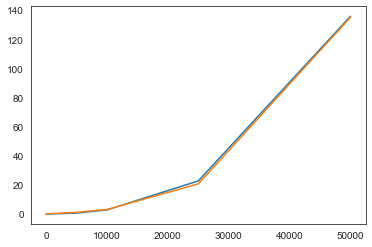

In [51]:
plt.plot(n, t)
plt.plot(n, [(nn / 10000) ** 3 + nn / 5000 for nn in n]);

In [52]:
((100000 / 10000) ** 3 + 100000 / 5000) / 60

17.0

In [22]:
deb = time.time()
time.sleep(1)
fin = time.time()
fin - deb

1.00443696975708

In [28]:
sum([tt * 10 for tt in t]) / 60

26.959210658073424